# Sentiment Analysis on English-Hindi Code Mix Data

In [ ]:
#import sys
#sys.version

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Dissertation
!ls
!pip3 install transformers
!pip install sentencepiece

/content/drive/MyDrive/Dissertation
'Dataset 1.txt'		   'Marathi-English code-mix data.txt'
'Dataset 2_train_14k.txt'  'Pesian-English code-mix data.txt'
'Dataset 2_val_3k.txt'	   'spanish-English code-mix data.txt'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.1 MB/s eta 0:00:00


In [ ]:

import tensorflow as tf
import torch


device_name = tf.test.gpu_device_name()

if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

if torch.cuda.is_available():

  device = torch.device("cuda")

  print('There are %d GPU(s) available.' % torch.cuda.device_count())

  print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
  print('No GPU available, using the CPU instead.')
  device = torch.device("cpu")

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla T4


## Parsing data

In [ ]:
import pandas as pd

In [ ]:
#df_english = pd.read_csv("/content/drive/MyDrive/Dissertation/Dataset 2_train_14k.txt" )
#print('Number of training sentences in training set: {:,}\n'.format(df_english.shape[0]))

In [ ]:
df_hinglish = pd.read_csv("/content/drive/MyDrive/Dissertation/Dataset 2_train_14k.txt" )
print('Number of training sentences in training set: {:,}\n'.format(df_hinglish.shape[0]))

Number of training sentences in training set: 13,967



In [ ]:
print('Train Hinglish dataset: \n', df_hinglish.head())

Train Hinglish dataset: 
       id                                           sentence  label sentiment
0   4330  nen á vist bolest vztek smutek zmatek osam ě l...      1   neutral
1  41616  Haan yaar neha pensive pensive kab karega woh ...      1   neutral
2   6648  television media congress ke liye nhi h Ye toh...      0  negative
3   2512  All India me nrc lagu kare w Kashmir se dhara ...      2  positive
4    610  who Pagal hai kya They aren t real issues Mand...      1   neutral


In [ ]:
df_hinglish = df_hinglish.drop("id", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_hinglishtrain, df_hinglishval = train_test_split(df_hinglish, test_size=0.2)

In [ ]:
df_hinglishtrain.head()

,sentence,label,sentiment
7477,Sidhu ji Suna tha sardar baat k pakke hote hai...,0,negative
11982,rathee Han to gaand k keede cow meat kliye peh...,0,negative
6938,RSSBLDC2018TYPING Aj ka yuva pagal nh h shab k...,1,neutral
11065,Thank you everyone sir ab toh aap ka reply ban...,2,positive
12391,We thank M Sanaulla Shareef for registering as...,2,positive


In [ ]:
df_hinglishtrain["sentiment"].value_counts()

neutral     4175
positive    3741
negative    3257
Name: sentiment, dtype: int64

<Axes: >

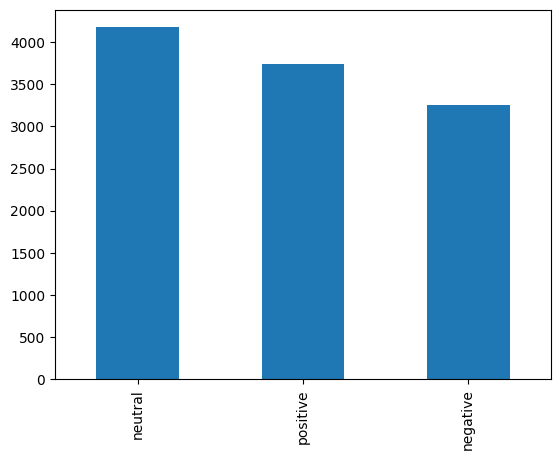

In [ ]:
df_hinglishtrain["sentiment"].value_counts().plot.bar()

<Axes: ylabel='sentiment'>

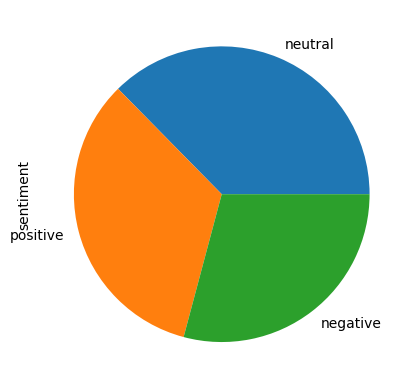

In [ ]:
df_hinglishtrain["sentiment"].value_counts().plot.pie()

In [ ]:
import pandas as pd

df_1 = pd.read_csv("/content/drive/MyDrive/Dissertation/Marathi-English code-mix data.txt", sep = "\t", on_bad_lines='skip')
print('Number of training sentences in set: {:,}\n'.format(df_1.shape[0]))
df_1.head()

Number of training sentences in set: 3,999



,id,sentence,label,sentiment
0,1,I love my Kindle2 . naahi diel thand aahe kii ...,2,2
1,2,maajhe kindle2 vaachat Love it . lee childs ch...,2,2
2,3,"Ok , prakarnaat pratham kramank to fucking fuc...",2,2
3,4,aapan aapalya kindle2 prem karaal I 've had mi...,2,2
4,5,Fair enough . pan majhyakde thoda aahe and I t...,2,2


In [ ]:
df_1["sentiment"] = df_1["sentiment"].replace([0, 1, 2], ['Negative','Neutral','Positive'])
df_1.head()

,id,sentence,label,sentiment
0,1,I love my Kindle2 . naahi diel thand aahe kii ...,2,Positive
1,2,maajhe kindle2 vaachat Love it . lee childs ch...,2,Positive
2,3,"Ok , prakarnaat pratham kramank to fucking fuc...",2,Positive
3,4,aapan aapalya kindle2 prem karaal I 've had mi...,2,Positive
4,5,Fair enough . pan majhyakde thoda aahe and I t...,2,Positive


<Axes: ylabel='sentiment'>

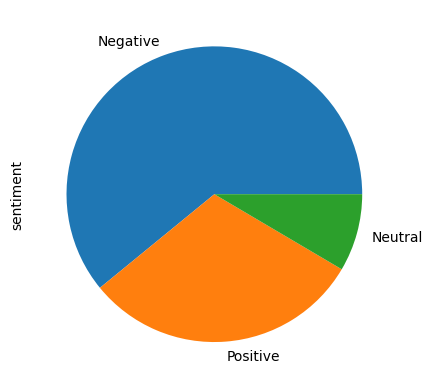

In [ ]:
df_1["sentiment"].value_counts().plot.pie()

In [ ]:
#from sklearn.model_selection import train_test_split

df_1train, df_1val = train_test_split(df_1, test_size=0.2)

In [ ]:
print(df_1train.shape[0])
print(df_1val.shape[0])

3199
800


In [ ]:
df_1train.head()

,id,sentence,label,sentiment
1084,1086,jeva lebon kele jate enbie madhye he will prob...,2,Positive
1860,1862,No . me chidchid naahi aata saathi Maybe later .,0,Negative
3351,3353,kaay sambhog ha bindu aahe of deleting tweets ...,0,Negative
3062,3064,Google nehami ek changli jaagaa asate paahane ...,2,Positive
2336,2338,"ek nanus dya a fish , u feed him for the day ....",0,Negative


<Axes: >

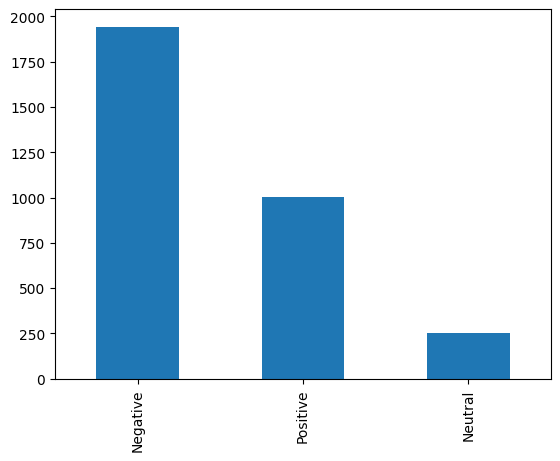

In [ ]:
df_1train["sentiment"].value_counts().plot.bar()

<Axes: ylabel='sentiment'>

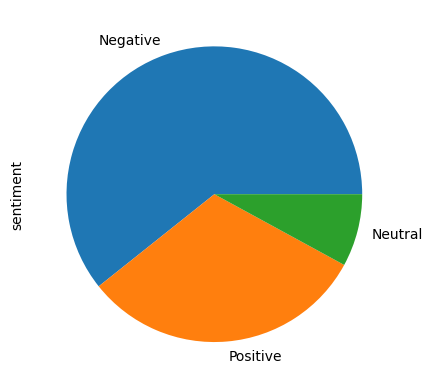

In [ ]:
df_1train["sentiment"].value_counts().plot.pie()

In [ ]:
#df_2 = pd.read_csv("/content/drive/MyDrive/Dissertation/Pesian-English code-mix data.txt")
#print('Number of training sentences in set: {:,}\n'.format(df_2.shape[0]))
#df_2.head()

In [ ]:
#df_2.drop(['L1','L2','L3'], inplace=True, axis=1)

In [ ]:
#df_2.drop('TweetID', inplace=True, axis=1)
#df_2.head()

In [ ]:
#df_2 = df_2.rename(columns={'SearchedWord': 'Sentence', 'Final_Label': 'Sentiment'})
#df_2.head()

In [ ]:
#df_2["Sentiment"] = df_2["Sentiment"].replace(['neg','neu','pos'],['Negative','Neutral','Positive'])

In [ ]:
#df_2["label"] = df_2["Sentiment"].replace(['Negative','Neutral','Positive'],[0,1,2])
#df_2.head()

In [ ]:
#df_2.iloc[:,[0,2,1]]

In [ ]:
#df_2["sentence"] = df_2["Sentence"]
#df_2["sentiment"] = df_2["Sentiment"]
#df_2.head()

In [ ]:
#df_2.drop(["Sentence","Sentiment"], inplace = True, axis=1)
#df_2.iloc[:,[1, 2, 0]]

In [ ]:
#df_2 = df_2.iloc[:, [1, 0, 2]]

In [ ]:
#df_2.head()

In [ ]:
#df_2train, df_2val = train_test_split(df_2, test_size=0.2)

In [ ]:
#print(df_2train.shape[0], df_2test.shape[0])

In [ ]:
#df_2train.head()

In [ ]:
#df_2train["sentiment"].value_counts().plot.bar()

In [ ]:
#df_2train["sentiment"].value_counts().plot.pie()

In [ ]:
df_3 = pd.read_csv("/content/drive/MyDrive/Dissertation/spanish-English code-mix data.txt" )
print('Number of sentences in set: {:,}\n'.format(df_3.shape[0]))
df_3.head()

Number of sentences in set: 16,999



,tweet,label
0,So that means tomorrow cruda segura lol,positive
1,Tonight peda segura,neutral
2,Eres tan mala vieja bruja interesada,negative
3,Yo kiero Pretzels lol,neutral
4,Fuck that ni ke el me vaya a mantener toda la ...,negative


In [ ]:
df_3.rename(columns = {'tweet':'sentence', 'label':'sentiment'}, inplace = True)

In [ ]:
df_3["label"] = df_3["sentiment"].replace(['negative','neutral','positive'],[0,1,2])

In [ ]:
df_3 = df_3.iloc[:, [0, 2, 1]]

In [ ]:
df_3["label"].unique()

array([2, 1, 0, 'lang2'], dtype=object)

In [ ]:
df_3["label"].value_counts()

2        8263
1        5669
0        3063
lang2       4
Name: label, dtype: int64

In [ ]:
df_3 = df_3[df_3['label'] != 'lang2']

In [ ]:
df_3 = df_3.dropna()

In [ ]:
df_3.isnull().values.any()

False

In [ ]:
pd.to_numeric(df_3['label'])

0        2
1        1
2        0
3        1
4        0
        ..
16994    2
16995    1
16996    2
16997    2
16998    2
Name: label, Length: 16892, dtype: int64

In [ ]:
df_3train, df_3val = train_test_split(df_3, test_size=0.2)
print(df_3train.shape[0], df_3val.shape[0])

13513 3379


In [ ]:
df_3val['label'] = pd.to_numeric(df_3val['label'])

In [ ]:
df_3train['label'] = pd.to_numeric(df_3train['label'])

In [ ]:
df_3train.dtypes

sentence     object
label         int64
sentiment    object
dtype: object

In [ ]:
df_3train.head()

,sentence,label,sentiment
5144,Mera mera vamos a ver civil war,1,neutral
6897,RT : me encanta hablar con personas open minde...,1,neutral
2048,El taquito is abt to hit the spot !! ;),2,positive
9754,Okay por fin tengo mi pre matrcula set,1,neutral
10554,I GOTHAM ! Buenas noches Zombers !,2,positive


<Axes: >

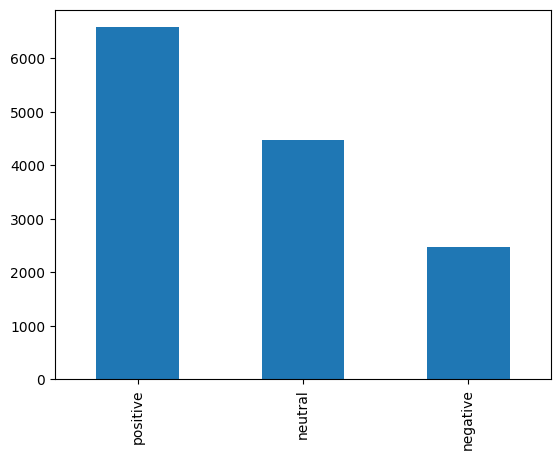

In [ ]:
df_3train["sentiment"].value_counts().plot.bar()

<Axes: ylabel='sentiment'>

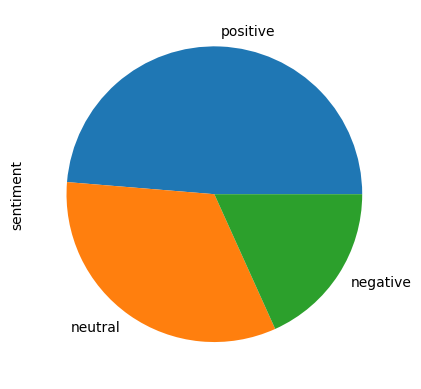

In [ ]:
df_3train["sentiment"].value_counts().plot.pie()

In [ ]:
df_combtrain = pd.concat([df_hinglishtrain, df_1train, df_3train])
df_combval = pd.concat([df_hinglishval, df_1val, df_3val])

In [ ]:
print(df_combtrain.shape[0], df_combval.shape[0])

27885 6973


In [ ]:
df_combtrain.head()

,sentence,label,sentiment,id
7477,Sidhu ji Suna tha sardar baat k pakke hote hai...,0,negative,NaN
11982,rathee Han to gaand k keede cow meat kliye peh...,0,negative,NaN
6938,RSSBLDC2018TYPING Aj ka yuva pagal nh h shab k...,1,neutral,NaN
11065,Thank you everyone sir ab toh aap ka reply ban...,2,positive,NaN
12391,We thank M Sanaulla Shareef for registering as...,2,positive,NaN


<Axes: >

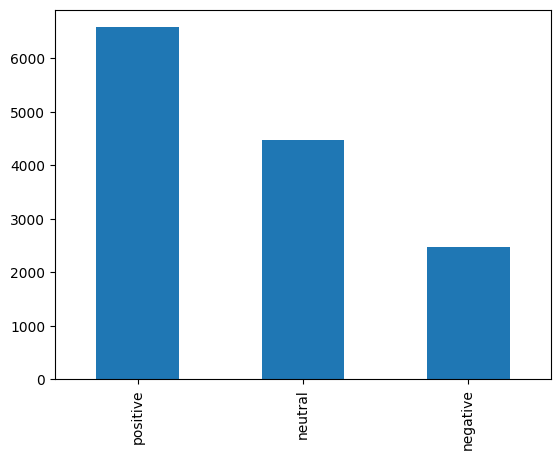

In [ ]:
df_3train["sentiment"].value_counts().plot.bar()

<Axes: ylabel='sentiment'>

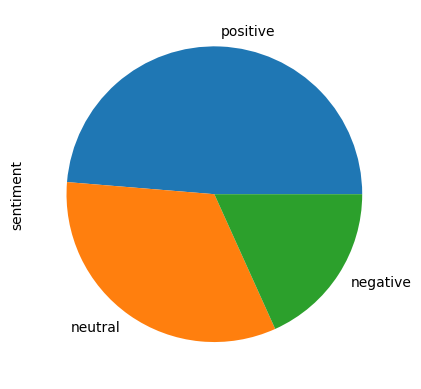

In [ ]:
df_3train["sentiment"].value_counts().plot.pie()

In [ ]:
df_hinglishtrain['label'].value_counts()

1    4175
2    3741
0    3257
Name: label, dtype: int64

In [ ]:
df_1train['label'].value_counts()

0    1942
2    1003
1     254
Name: label, dtype: int64

In [ ]:
df_3train['label'].value_counts()

2    6580
1    4467
0    2466
Name: label, dtype: int64

In [ ]:
Hyperparameter = ['Epochs', 'Batch Size', 'Learning Rate', 'Max Sequence Length', 'Optimizer' ]
Value = [3, 32, '3e-5', 160 ,'AdamW']
dfpara = pd.DataFrame({'Hyperparameter' : Hyperparameter, 'Value': Value})
dfpara

,Hyperparameter,Value
0,Epochs,3
1,Batch Size,32
2,Learning Rate,3e-5
3,Max Sequence Length,160
4,Optimizer,AdamW


In [ ]:
Total = [11173, 3199, 13513]
dfdata = pd.DataFrame({'Dataset' : Index, 'Positive': Positive, 'Neutral' : Neutral, 'Negative': Negative, 'Total' : Total}, index=None)
dfdata

,Dataset,Positive,Neutral,Negative,Total
0,Hindi-English,3741,4175,3257,11173
1,Marathi-English,1003,254,1942,3199
2,Spanish-English,6580,4467,2466,13513


<Axes: >

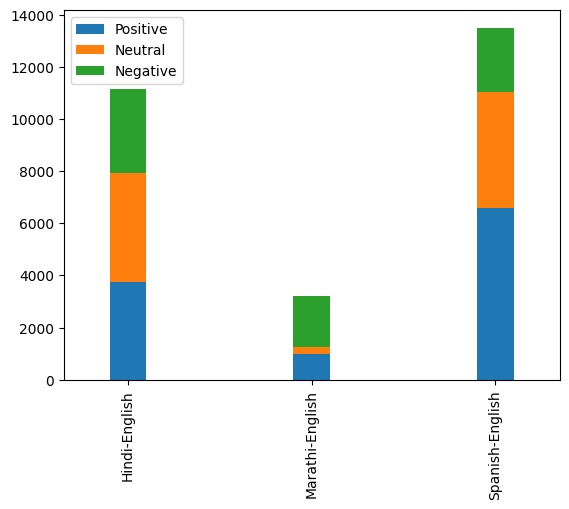

In [ ]:
Positive = [3741, 1003, 6580]
Neutral = [4175, 254, 4467]
Negative = [3257, 1942, 2466]
Index = ['Hindi-English', 'Marathi-English', 'Spanish-English']

df = pd.DataFrame({'Positive': Positive, 'Neutral' : Neutral, 'Negative': Negative}, index=Index)

df.plot.bar(width = 0.2, stacked=True)

In [ ]:
#sentences_hinglishtrain = df_hinglish.sentence.values
#labels_hinglishtrain = df_hinglish.label.values
#sentences_hinglishval = df_hinglishval.sentence.values
#labels_hinglishval = df_hinglishval.label.values

In [ ]:
#sentences_df1train = df_1train.sentence.values
#labels_df1train = df_1train.label.values
#sentences_df1val = df_1val.sentence.values
#labels_df1val = df_1val.label.values

In [ ]:
#sentences_df2train = df_2train.sentence.values
#labels_df2train = df_2train.label.values
#sentences_df2val = df_2val.sentence.values
#labels_df2val = df_2val.label.values

In [ ]:
sentences_train = df_hinglishtrain.sentence.values
labels_train = df_hinglishtrain.label.values
sentences_val = df_hinglishval.sentence.values
labels_val = df_hinglishval.label.values

In [ ]:
#import pandas as pd

df_test = pd.read_csv("/content/drive/MyDrive/Dissertation/Dataset 2_val_3k.txt" )

#print('Number of training sentences in training set: {:,}\n'.format(df_train.shape[0]))
print('Number of training sentences in val set: {:,}\n'.format(df_test.shape[0]))

#sentences_train = df_train.sentence.values
#labels_train = df_train.label.values
sentences_test = df_test.sentence.values
labels_test = df_test.label.values

#print('Train dataset: \n', df_train.head())
print('test dataset: \n',df_test.head())

Number of training sentences in val set: 2,997

test dataset: 
       id                                           sentence  label sentiment
0  30258  modi mantrimandal may samil honay par badhai n...      2  positive
1  16648                Rashid Tu toh naamakool hai Mare h       0  negative
2  28511  U saw caste and religion in them nation saw ta...      0  negative
3  10466  sir local police station pe complaint krne par...      1   neutral
4  19266  Ve Maahi song from Kesari is current favourite...      2  positive


In [ ]:
df_test = df_test.drop("id", axis=1)

In [ ]:
df_test.head()

,sentence,label,sentiment
0,modi mantrimandal may samil honay par badhai n...,2,positive
1,Rashid Tu toh naamakool hai Mare h,0,negative
2,U saw caste and religion in them nation saw ta...,0,negative
3,sir local police station pe complaint krne par...,1,neutral
4,Ve Maahi song from Kesari is current favourite...,2,positive


<Axes: >

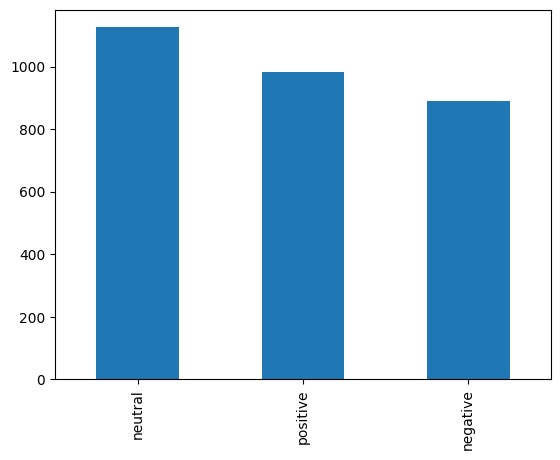

In [ ]:
df_test["sentiment"].value_counts().plot.bar()

<Axes: ylabel='sentiment'>

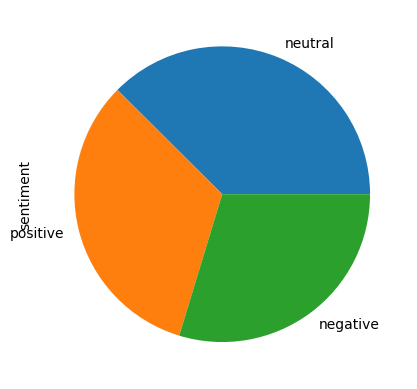

In [ ]:
df_test["sentiment"].value_counts().plot.pie()

## Tokenizing the data

In [ ]:
from transformers import XLMRobertaTokenizer

In [ ]:
print('Loading XLMRobertaTokenizer ...')
model = 'xlm-roberta-base'
tokenizer = XLMRobertaTokenizer.from_pretrained(model, do_lower_case=True)
tokenized_train = tokenizer.tokenize(sentences_train[0])
tokenized_ids_train = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences_train[0]))
tokenized_val = tokenizer.tokenize(sentences_val[0])
tokenized_ids_val = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences_val[0]))

print('Original Train Sentence: ', sentences_train[0])
print('Tokenized Train Sentence: ', tokenized_train)
print('Token Train IDs: ', tokenized_ids_train)

print('Original Val Sentence: ', sentences_val[0])
print('Tokenized Train Sentence: ', tokenized_val)
print('Token Train IDs: ', tokenized_ids_val)


Loading XLMRobertaTokenizer ...


Original Train Sentence:  Sidhu ji Suna tha sardar baat k pakke hote hai kya hua AAP saradar nahi ya baat ke pakke nahi 
Tokenized Train Sentence:  ['▁Si', 'dhu', '▁ji', '▁Sun', 'a', '▁tha', '▁sar', 'dar', '▁baat', '▁k', '▁pakke', '▁ho', 'te', '▁hai', '▁kya', '▁hua', '▁A', 'AP', '▁sara', 'dar', '▁nahi', '▁ya', '▁baat', '▁ke', '▁pakke', '▁nahi']
Token Train IDs:  [602, 21356, 890, 7550, 11, 3319, 10649, 1506, 107052, 472, 91254, 739, 67, 1337, 30427, 97853, 62, 15383, 39219, 1506, 6037, 151, 107052, 311, 91254, 6037]
Original Val Sentence:  Modi ji great h or janta ke liye apne kiye waade pr kayam h or janta ne jo Modi Sarkar 
Tokenized Train Sentence:  ['▁Modi', '▁ji', '▁great', '▁h', '▁or', '▁ja', 'nta', '▁ke', '▁liye', '▁apne', '▁ki', 'ye', '▁waa', 'de', '▁pr', '▁kaya', 'm', '▁h', '▁or', '▁ja', 'nta', '▁ne', '▁jo', '▁Modi', '▁Sarkar']
Token Train IDs:  [117712, 890, 6782, 1096, 707, 79, 4327, 311, 35318, 92469, 200, 1033, 6385, 112, 4083, 8410, 39, 1096, 707, 79, 4327, 108, 741, 1177

In [ ]:
model_tokenize = 'xlm-roberta-base'
tokenizer = XLMRobertaTokenizer.from_pretrained(model_tokenize, do_lower_case=True)
tokenized_test = tokenizer.tokenize(sentences_test[0])
tokenized_ids_test = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences_test[0]))


print('Original Test Sentence: ', sentences_test[0])
print('Tokenized Test Sentence: ', tokenized_test)
print('Token Test IDs: ', tokenized_ids_test)

Original Test Sentence:  modi mantrimandal may samil honay par badhai narmaday har
Tokenized Test Sentence:  ['▁modi', '▁man', 'tri', 'man', 'dal', '▁may', '▁sam', 'il', '▁ho', 'nay', '▁par', '▁bad', 'hai', '▁na', 'rma', 'day', '▁har']
Token Test IDs:  [43381, 332, 3996, 669, 2465, 1543, 1289, 379, 739, 13650, 366, 6494, 15251, 24, 17668, 5636, 182]


In [ ]:
import numpy as np

input_ids_test = []
attention_masks_test = []

for sent in sentences_test:
    encoded_dict = tokenizer.encode_plus(
                        sent,
                        add_special_tokens = True,
                        max_length = 160,
                        padding = 'max_length',
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )

    input_ids_test.append(encoded_dict['input_ids'])

    attention_masks_test.append(encoded_dict['attention_mask'])


input_ids_test = torch.cat(input_ids_test, dim=0)
attention_masks_test = torch.cat(attention_masks_test, dim=0)
labels_test = torch.tensor(labels_test)

print('Original test sentence \n: ', sentences_test[0])
print('Test Token IDs \n:', input_ids_test[0])
print('Test labels: \n', labels_test)
print('Test sentence shape:', np.shape(sentences_test))
print('Test token shape:', np.shape(input_ids_test))
print('Test token mask shape:', np.shape(attention_masks_test))
print('Test label shape:', np.shape(labels_test))
print('\n')

Original test sentence 
:  modi mantrimandal may samil honay par badhai narmaday har
Test Token IDs 
: tensor([    0, 43381,   332,  3996,   669,  2465,  1543,  1289,   379,   739,
        13650,   366,  6494, 15251,    24, 17668,  5636,   182,     2,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,    

In [ ]:
import numpy as np

input_ids_train = []
attention_masks_train = []
input_ids_val = []
attention_masks_val = []

for sent in sentences_train:
    encoded_dict = tokenizer.encode_plus(
                        sent,
                        add_special_tokens = True,
                        max_length = 160,
                        padding = 'max_length',
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )

    input_ids_train.append(encoded_dict['input_ids'])

    attention_masks_train.append(encoded_dict['attention_mask'])

for sent in sentences_val:
    encoded_dict = tokenizer.encode_plus(
                        sent,
                        add_special_tokens = True,
                        max_length = 160,
                        padding = 'max_length',
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )

    input_ids_val.append(encoded_dict['input_ids'])
    attention_masks_val.append(encoded_dict['attention_mask'])

input_ids_train = torch.cat(input_ids_train, dim=0)
attention_masks_train = torch.cat(attention_masks_train, dim=0)
labels_train = torch.tensor(labels_train)

input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)
labels_val = torch.tensor(labels_val)

print('Original train sentence \n: ', sentences_train[0])
print('Train Token IDs \n:', input_ids_train[0])
print('Train labels: \n', labels_train)
print('Train sentence shape:', np.shape(sentences_train))
print('Train token shape:', np.shape(input_ids_train))
print('Train token mask shape:', np.shape(attention_masks_train))
print('Train label shape:', np.shape(labels_train))
print('\n')
print('Original val sentence \n: ', sentences_val[0])
print('Val Token IDs \n:', input_ids_val[0])
print('Val labels: \n', labels_val)
print('Train sentence shape:', np.shape(sentences_val))
print('Train token shape:', np.shape(input_ids_val))
print('Train token mask shape:', np.shape(attention_masks_val))
print('Train label shape:', np.shape(labels_val))


Original train sentence 
:  Sidhu ji Suna tha sardar baat k pakke hote hai kya hua AAP saradar nahi ya baat ke pakke nahi 
Train Token IDs 
: tensor([     0,    602,  21356,    890,   7550,     11,   3319,  10649,   1506,
        107052,    472,  91254,    739,     67,   1337,  30427,  97853,     62,
         15383,  39219,   1506,   6037,    151, 107052,    311,  91254,   6037,
             2,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,   

##Training


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids_train, attention_masks_train, labels_train)
val_dataset = TensorDataset(input_ids_val, attention_masks_val, labels_val)

# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import XLMRobertaForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = XLMRobertaForSequenceClassification.from_pretrained(
    "xlm-roberta-base", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()
#model.to(device)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.den

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768,

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The XLMRoberta model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The XLMRoberta model has 201 different named parameters.

==== Embedding Layer ====

roberta.embeddings.word_embeddings.weight               (250002, 768)
roberta.embeddings.position_embeddings.weight             (514, 768)
roberta.embeddings.token_type_embeddings.weight             (1, 768)
roberta.embeddings.LayerNorm.weight                           (768,)
roberta.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

roberta.encoder.layer.0.attention.self.query.weight       (768, 768)
roberta.encoder.layer.0.attention.self.query.bias             (768,)
roberta.encoder.layer.0.attention.self.key.weight         (768, 768)
roberta.encoder.layer.0.attention.self.key.bias               (768,)
roberta.encoder.layer.0.attention.self.value.weight       (768, 768)
roberta.encoder.layer.0.attention.self.value.bias             (768,)
roberta.encoder.layer.0.attention.output.dense.weight     (768, 768)
roberta.encoder.layer.0.attention.output.dense.bias     

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 3e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 3

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()


for epoch_i in range(0, epochs):

    #Training

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    model.train()


    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()


        outputs = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)

        loss = outputs.loss
        logits = outputs.logits

        # Accumulate the training loss over all of the batches
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()


    avg_train_loss = total_train_loss / len(train_dataloader)


    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))



    print("")
    print("Running Validation...")

    t0 = time.time()


    model.eval()


    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0


    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)


        with torch.no_grad():

            outputs = model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)

            loss = outputs.loss
            logits = outputs.logits


        total_eval_loss += loss.item()


        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()


        total_eval_accuracy += flat_accuracy(logits, label_ids)



    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))


    avg_val_loss = total_eval_loss / len(validation_dataloader)


    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    350.    Elapsed: 0:00:34.
  Batch    80  of    350.    Elapsed: 0:01:07.
  Batch   120  of    350.    Elapsed: 0:01:39.
  Batch   160  of    350.    Elapsed: 0:02:11.
  Batch   200  of    350.    Elapsed: 0:02:43.
  Batch   240  of    350.    Elapsed: 0:03:15.
  Batch   280  of    350.    Elapsed: 0:03:47.
  Batch   320  of    350.    Elapsed: 0:04:19.

  Average training loss: 0.94
  Training epcoh took: 0:04:42

Running Validation...
  Accuracy: 0.60
  Validation Loss: 0.87
  Validation took: 0:00:20

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    350.    Elapsed: 0:00:32.
  Batch    80  of    350.    Elapsed: 0:01:04.
  Batch   120  of    350.    Elapsed: 0:01:36.
  Batch   160  of    350.    Elapsed: 0:02:08.
  Batch   200  of    350.    Elapsed: 0:02:40.
  Batch   240  of    350.    Elapsed: 0:03:12.
  Batch   280  of    350.    Elapsed: 0:03:44.
  Batch   320  of    350.    Elapsed: 0:04:16.

  Averag

In [ ]:
training_stats

[{'epoch': 1,
  'Training Loss': 0.9381292126859937,
  'Valid. Loss': 0.8677531866864725,
  'Valid. Accur.': 0.5988636363636364,
  'Training Time': '0:04:42',
  'Validation Time': '0:00:20'},
 {'epoch': 2,
  'Training Loss': 0.8134581085613796,
  'Valid. Loss': 0.8328459418632768,
  'Valid. Accur.': 0.6227272727272727,
  'Training Time': '0:04:40',
  'Validation Time': '0:00:21'},
 {'epoch': 3,
  'Training Loss': 0.7203908883673804,
  'Valid. Loss': 0.8643032603643157,
  'Valid. Accur.': 0.6319602272727273,
  'Training Time': '0:04:41',
  'Validation Time': '0:00:21'}]

In [ ]:
import pandas as pd

# Display floats with two decimal places.
#pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.938129,0.867753,0.598864,0:04:42,0:00:20
2,0.813458,0.832846,0.622727,0:04:40,0:00:21
3,0.720391,0.864303,0.631960,0:04:41,0:00:21


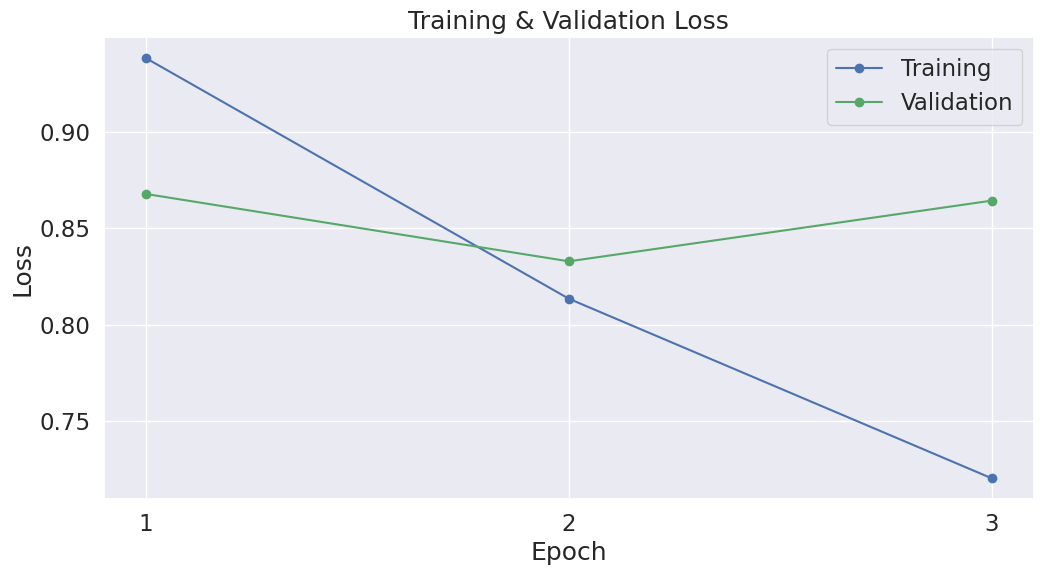

In [ ]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])

plt.show()

In [ ]:
#training_loss = []
#validation_loss = []

#for stats in training_stats:
  #training_loss.append(stats["Training Loss"])
  #validation_loss.append(stats["Valid. Loss"])

In [ ]:
#from matplotlib import pyplot as plt
#plt.plot(training_loss, label='train_loss')
#plt.plot(validation_loss,label='val_loss')
#plt.legend()
#plt.show

##Testing

In [ ]:
#from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
test_dataset = TensorDataset(input_ids_test, attention_masks_test, labels_test)

# The DataLoader needs to know our batch size for testing, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our test set.
# For test the order doesn't matter, so we'll just read them sequentially.
test_dataloader = DataLoader(
            test_dataset, # The test samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
model.eval()


total_testeval_accuracy = 0
total_testeval_loss = 0
nb_testeval_steps = 0


for batch in test_dataloader:

  testb_input_ids = batch[0].to(device)
  testb_input_mask = batch[1].to(device)
  testb_labels = batch[2].to(device)


  with torch.no_grad():

    testoutputs = model(testb_input_ids,
                                   token_type_ids=None,
                                   attention_mask=testb_input_mask,
                                   labels=testb_labels)

    loss = testoutputs.loss
    logits = testoutputs.logits


  total_testeval_loss += loss.item()


  testlogits = logits.detach().cpu().numpy()
  testlabel_ids = testb_labels.to('cpu').numpy()


  total_testeval_accuracy += flat_accuracy(testlogits, testlabel_ids)



avg_test_accuracy = total_testeval_accuracy / len(test_dataloader)
print("  Accuracy: {0:.2f}".format(avg_test_accuracy))


    #avg_val_loss = total_eval_loss / len(validation_dataloader)


    #validation_time = format_time(time.time() - t0)

    #print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    #print("  Validation took: {:}".format(validation_time))


  Accuracy: 0.61
